# Lecture 7 - CME 193 - scikit-learn

[Scikit-learn](https://scikit-learn.org/stable/) is a library that allows you to do machine learning, that is, make predictions from data, in Python. There are four basic machine learning tasks:

 1. Regression: predict a number from datapoints, given datapoints and corresponding numbers
 2. Classification: predict a category from datapoints, given datapoints and corresponding cateogories
 3. Clustering: predict a category from datapoints, given only datapoints
 4. Dimensionality reduction: make datapoints lower-dimensional so that we can visualize the data

Here is a [handy flowchart](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) of when to use each technique.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Regression
Abalone are a type of edible marine snail, and they have internal rings that correspond to their age (like trees). In the following, we will use a dataset of [abalone measurements](https://archive.ics.uci.edu/ml/datasets/abalone). It has the following fields:

    Sex / nominal / -- / M, F, and I (infant) 
    Length / continuous / mm / Longest shell measurement 
    Diameter	/ continuous / mm / perpendicular to length 
    Height / continuous / mm / with meat in shell 
    Whole weight / continuous / grams / whole abalone 
    Shucked weight / continuous	/ grams / weight of meat 
    Viscera weight / continuous / grams / gut weight (after bleeding) 
    Shell weight / continuous / grams / after being dried 
    Rings / integer / -- / +1.5 gives the age in years 

Suppose we are interested in predicting the age of the abalone given their measurements. This is an example of a regression problem.

In [2]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',
                   header=None, names=['sex', 'length', 'diameter', 'height', 'weight', 'shucked_weight',
                                       'viscera_weight', 'shell_weight', 'rings'])

In [3]:
df.head()

,sex,length,diameter,height,weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.describe()

,length,diameter,height,weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


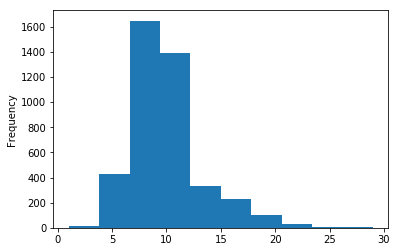

In [5]:
df['rings'].plot(kind='hist')

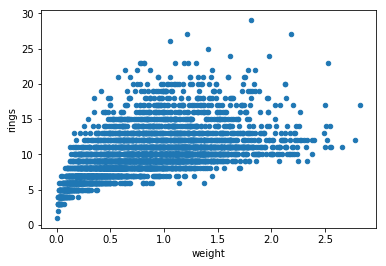

In [6]:
df.plot('weight', 'rings', kind='scatter')

In [14]:
X = df.drop(['sex', 'rings'], axis=1).to_numpy()
y = df['rings'].to_numpy()

In [15]:
X

array([[0.455 , 0.365 , 0.095 , ..., 0.2245, 0.101 , 0.15  ],
       [0.35  , 0.265 , 0.09  , ..., 0.0995, 0.0485, 0.07  ],
       [0.53  , 0.42  , 0.135 , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [0.6   , 0.475 , 0.205 , ..., 0.5255, 0.2875, 0.308 ],
       [0.625 , 0.485 , 0.15  , ..., 0.531 , 0.261 , 0.296 ],
       [0.71  , 0.555 , 0.195 , ..., 0.9455, 0.3765, 0.495 ]])

In [16]:
y

array([15,  7,  9, ...,  9, 10, 12])

In [19]:
from sklearn import linear_model
model = linear_model.LinearRegression()  # can replace with linear_model.Ridge(), or others
model.fit(X, y)
print(model.coef_, model.intercept_)

[  2.28085462   8.26880421   8.73670645   7.33466364 -17.92538504
  -6.5629756   10.39119071] 3.213680659178479


In [20]:
print(model.score(X, y))  # compute R^2 value

0.5249130726736859


In [11]:
model.predict(np.array([[1.5], [2.2]]))  # Make two new predictions

array([12.31860263, 14.80563908])

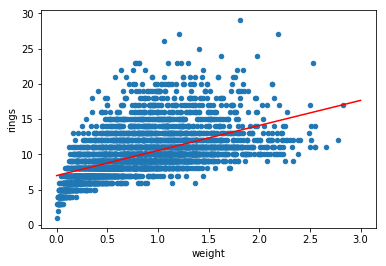

In [13]:
df.plot('weight', 'rings', kind='scatter')

# Plotting the fitted line
weight = np.linspace(0, 3, 10).reshape(-1, 1)
plt.plot(weight, model.predict(weight), 'r')

## Classification

Another example of a machine learning problem is classification. Here we will use a dataset of flower measurements from three different flower species of *Iris* (*Iris setosa*, *Iris virginica*, and *Iris versicolor*). We aim to predict the species of the flower. Because the species is not a numerical output, it is not a regression problem, but a classification problem.

In [6]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:,:2]  # Take only first two columns of the data (for demo purposes)
y = iris.target_names[iris.target]

In [7]:
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [5]:
y

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

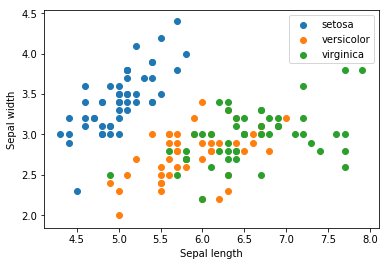

In [8]:
for name in iris.target_names:
    plt.scatter(X[y == name, 0], X[y == name, 1], label=name)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 2) (120,)
(30, 2) (30,)


In [10]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
X_test

array([[5.8, 2.8],
       [6. , 2.2],
       [5.5, 4.2],
       [7.3, 2.9],
       [5. , 3.4],
       [6.3, 3.3],
       [5. , 3.5],
       [6.7, 3.1],
       [6.8, 2.8],
       [6.1, 2.8],
       [6.1, 2.6],
       [6.4, 3.2],
       [6.1, 2.8],
       [6.5, 2.8],
       [6.1, 2.9],
       [4.9, 3.6],
       [6. , 2.9],
       [5.5, 2.6],
       [4.8, 3. ],
       [5.4, 3.9],
       [5.6, 2.8],
       [5.6, 3. ],
       [4.8, 3.4],
       [4.4, 2.9],
       [6.2, 2.8],
       [4.6, 3.6],
       [5.1, 3.8],
       [6.2, 2.9],
       [5. , 2.3],
       [5. , 3.4]])

In [11]:
model.predict(X_test)

array(['versicolor', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'versicolor', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'virginica',
       'setosa', 'setosa', 'virginica', 'versicolor', 'setosa'],
      dtype='<U10')

## Evaluating your model

In [14]:
model.predict(X_test) == y_test

array([False,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True, False, False, False, False,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True])

In [15]:
np.mean(model.predict(X_test) == y_test)  # Accuracy

0.6666666666666666

In [16]:
import sklearn.metrics as metrics
metrics.accuracy_score(model.predict(X_test), y_test)

0.6666666666666666

In [17]:
print(metrics.classification_report(model.predict(X_test), y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.38      0.71      0.50         7
   virginica       0.67      0.33      0.44        12

   micro avg       0.67      0.67      0.67        30
   macro avg       0.68      0.68      0.65        30
weighted avg       0.72      0.67      0.66        30



In [18]:
# Cross validation
from sklearn.model_selection import cross_val_score
model = KNeighborsClassifier()
scores = cross_val_score(model, X, y, cv=5)
scores

array([0.7       , 0.76666667, 0.73333333, 0.86666667, 0.76666667])

In [19]:
print(f"Accuracy: {scores.mean()} (+/- {scores.std()})")

Accuracy: 0.7666666666666667 (+/- 0.05577733510227173)


# Exercise 9
Try to fit some of the models in the following cell to the same data. Compute the relevant statistics (e.g. accuracy, precision, recall). Look up the documentation for the classifier, and see if the classifier takes any parameters. How does changing the parameter affect the result?

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [22]:
# YOUR CODE HERE
model = MLPClassifier(max_iter=1000)
scores = cross_val_score(model, X, y, cv=5)
print(f"Accuracy: {scores.mean()} (+/- {scores.std()})")

Accuracy: 0.8266666666666668 (+/- 0.06463573143221774)


## Clustering

Clustering is useful if we don't have a dataset labelled with the categories we want to predict, but we nevertheless expect there to be a certain number of categories. For example, suppose we have the previous dataset, but we are missing the labels. We can use a clustering algorithm like k-means to *cluster* the datapoints. Because we don't have labels, clustering is what is called an **unsupervised learning** algorithm.

In [23]:
X = iris.data

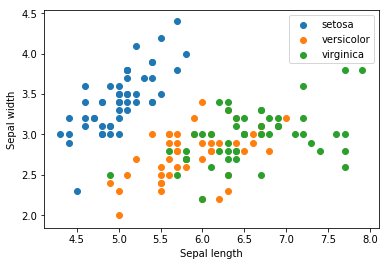

In [24]:
for name in iris.target_names:
    plt.scatter(X[y == name, 0], X[y == name, 1], label=name)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()

In [37]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [38]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 3, 2,
       3, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 2, 2, 2,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0,
       2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2], dtype=int32)

In [27]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

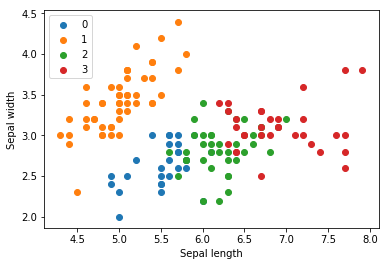

In [36]:
for i in range(4):
    plt.scatter(X[model.labels_ == i, 0], X[model.labels_ == i, 1], label=i)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()

## Dimensionality reduction

Dimensionality reduction is another unsupervised learning problem (that is, it does not require labels). It aims to project datapoints into a lower dimensional space while preserving distances between datapoints.

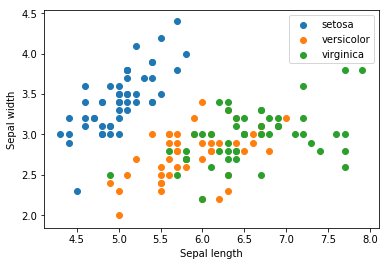

In [40]:
for name in iris.target_names:
    plt.scatter(X[y == name, 0], X[y == name, 1], label=name)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()

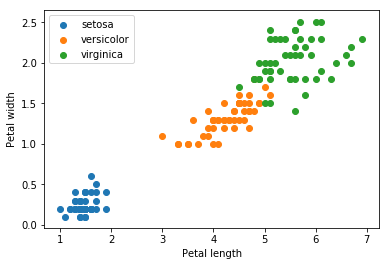

In [41]:
for name in iris.target_names:
    plt.scatter(X[y == name, 2], X[y == name, 3], label=name)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend()
plt.show()

In [42]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [43]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2)
X_transformed = model.fit_transform(X)

In [45]:
print(X.shape, X_transformed.shape)

(150, 4) (150, 2)


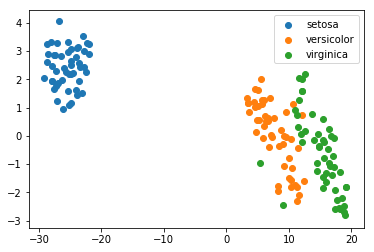

In [47]:
for name in iris.target_names:
    plt.scatter(X_transformed[y == name, 0], X_transformed[y == name, 1], label=name)
    
plt.legend()
plt.show()